В этом ноутбуке мы проведём разведочный анализ (EDA) датасета rev8020split_desc.csv.

Оценим полноту, уникальность, выбросы и сделаем выводы.

# **Импорт первичных необходиммых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Посмотрим на "Сырые данные"

In [2]:
data = pd.read_csv('/content/rev8020split_desc.csv')
data

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),idx
0,S(=O)(=O)(N(C)c1cc(C(=O)NC(C(O)CC(OC)C(=O)NC(C...,BACE_275,1,Train,9.494850,851.95490,3.9826,8,5,20,...,106.411420,39.931225,290.245330,304.418120,52.429832,0.000000,39.531593,0.0,0.000000,1
1,O=C(NCCC(C)(C)C)C(Cc1c(N)nc2c(c1)cc(-c1c(C)ccc...,BACE_276,1,Train,9.187087,403.55969,5.7644,2,2,7,...,84.122887,46.316166,247.789380,90.395477,37.133846,0.000000,7.980170,0.0,0.000000,2
2,O=C(N[C@H]1CC(C)(C)OCC1)[C@@H](Cc1c(N)nc2c(c1)...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.0,0.000000,3
3,Fc1cc(F)cc(CC(NC(=O)C(CCc2ccccc2)N2C(=O)C(NC(=...,BACE_277,1,Train,9.050610,615.73102,1.4277,5,5,13,...,67.960800,38.272877,304.052460,152.161880,34.923889,7.980170,32.336994,0.0,24.663788,4
4,Fc1cc(CC(NC(=O)C)C(O)C[N+]C2c3c(OC4(C2)CCC4)nc...,BACE_279,1,Train,9.000000,484.62601,2.9008,4,3,9,...,48.077168,45.445873,299.932980,95.216072,34.435734,15.387257,8.188327,0.0,24.663788,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,Clc1cc2nc(N)n(CCCC(=O)NCCC3C[N+]CC3)c2cc1,BACE_1538,0,Valid,3.352617,350.86630,0.5172,2,3,7,...,26.907076,34.638718,164.493130,97.635429,30.107586,9.368159,7.980170,0.0,24.663788,1471
1471,Clc1cc2nc(N)n(C(CC(=O)NC(C)C)CC)c2cc1,BACE_1540,0,Valid,3.158015,308.80640,2.9012,2,2,5,...,37.212799,50.800800,160.695500,51.840363,30.107586,9.368159,7.980170,0.0,0.000000,1472
1472,Nc1c(N2CCCC2)nc2c(n1)cccc2,BACE_200,0,Valid,3.060481,214.26640,2.2544,2,1,1,...,17.159994,26.058720,100.582280,51.645077,34.124249,0.000000,0.000000,0.0,0.000000,1473
1473,Nc1nccc2c1cccc2,BACE_202,0,Valid,3.000000,144.17320,1.3830,1,1,0,...,34.319988,10.536325,12.878222,64.572937,27.097986,0.000000,0.000000,0.0,0.000000,1474


# **Первичный осмотр**

In [3]:
data.head(10)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),idx
0,S(=O)(=O)(N(C)c1cc(C(=O)NC(C(O)CC(OC)C(=O)NC(C...,BACE_275,1,Train,9.494850,851.95490,3.9826,8,5,20,...,106.411420,39.931225,290.24533,304.418120,52.429832,0.000000,39.531593,0.0,0.000000,1
1,O=C(NCCC(C)(C)C)C(Cc1c(N)nc2c(c1)cc(-c1c(C)ccc...,BACE_276,1,Train,9.187087,403.55969,5.7644,2,2,7,...,84.122887,46.316166,247.78938,90.395477,37.133846,0.000000,7.980170,0.0,0.000000,2
2,O=C(N[C@H]1CC(C)(C)OCC1)[C@@H](Cc1c(N)nc2c(c1)...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.434910,37.133846,0.000000,7.980170,0.0,0.000000,3
3,Fc1cc(F)cc(CC(NC(=O)C(CCc2ccccc2)N2C(=O)C(NC(=...,BACE_277,1,Train,9.050610,615.73102,1.4277,5,5,13,...,67.960800,38.272877,304.05246,152.161880,34.923889,7.980170,32.336994,0.0,24.663788,4
4,Fc1cc(CC(NC(=O)C)C(O)C[N+]C2c3c(OC4(C2)CCC4)nc...,BACE_279,1,Train,9.000000,484.62601,2.9008,4,3,9,...,48.077168,45.445873,299.93298,95.216072,34.435734,15.387257,8.188327,0.0,24.663788,5
5,Fc1cc(F)cc(CC(NC(=O)c2cc(C(=O)N(CCC)CCC)cc(/C(...,BACE_280,1,Train,9.000000,639.75238,3.8163,6,3,17,...,37.771442,88.147522,261.31158,250.925540,35.014828,0.000000,23.571255,0.0,24.663788,6
6,O=C1NC(C(O)C[N+]C2(c3cc(C(C)C)ccc3)CC2)Cc2cc(O...,BACE_282,1,Train,9.000000,612.77820,5.9233,5,3,7,...,63.511436,72.592865,292.79620,218.890750,11.941755,0.000000,23.859961,0.0,24.663788,7
7,S(=O)(=O)(N(C)c1cc2C(=O)NC(C(O)C[N+]Cc3cc(C(C)...,BACE_281,1,Train,9.000000,637.85242,4.7983,4,4,10,...,73.817162,72.592865,318.65012,209.972760,33.920502,0.000000,15.879790,0.0,24.663788,8
8,Fc1cc(F)cc(C[C@H](NC(=O)[C@H](CCc2ccccc2)N2C(=...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.076750,34.923889,7.980170,24.148668,0.0,24.663788,9
9,Fc1cc(F)cc(CC(NC(=O)C(CCc2ccccc2)N2C(=O)C(NC(=...,BACE_284,1,Train,8.823909,706.84161,2.4842,6,4,16,...,76.540794,55.432873,314.97437,228.665770,34.923889,7.980170,24.148668,0.0,24.663788,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Columns: 595 entries, mol to idx
dtypes: float64(210), int64(382), object(3)
memory usage: 6.7+ MB


# **Описание структуры**

In [5]:
print("Размер датасета:", data.shape)
print("Типы данных:\n", data.dtypes.value_counts())

Размер датасета: (1475, 595)
Типы данных:
 int64      382
float64    210
object       3
Name: count, dtype: int64


# **Полнота данных (Completeness)**

In [6]:
# Доля непустых значений на столбец
completeness = data.notna().mean()

# столбцы, у которых completeness < 0.98
low_compl = completeness[completeness < 0.98]
print("Столбцы с низкой полнотой (< 98%):\n", low_compl)

Столбцы с низкой полнотой (< 98%):
 Series([], dtype: float64)


# **Уникальность записей (Uniqueness)**

In [8]:
# Есть идентификатор “CID”, проверяем дубли
if "CID" in data.columns:
    uniq = data["CID"].nunique() / len(data)
    print("Уникальность CID:", uniq)

Уникальность CID: 1.0


# **Выбросы / аномалии (Outlier Ratio)**

In [11]:
# На числовых колонках мы будем использовать IQR метод для каждой
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
outlier_ratios = {}
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (data[col] < lower) | (data[col] > upper)
    outlier_ratio = mask.sum() / len(data)
    outlier_ratios[col] = outlier_ratio

# Выводим столбцы с наибольшим уровнем выбросов (например > 0.05)
high_outliers = {c: r for c, r in outlier_ratios.items() if r > 0.05}
high_outliers

{'HBA': np.float64(0.13084745762711864),
 'ChiralCenterCount': np.float64(0.08271186440677966),
 'sCH3_Key': np.float64(0.08677966101694916),
 'ssCH2_Key': np.float64(0.07796610169491526),
 'tsC_Key': np.float64(0.06847457627118644),
 'dssC_Key': np.float64(0.10711864406779661),
 'aaaC_Key': np.float64(0.11457627118644068),
 'aasN_Key': np.float64(0.17220338983050848),
 'dO_Key': np.float64(0.14847457627118643),
 'aaS_Key': np.float64(0.062372881355932205),
 'ddssS_Key': np.float64(0.22372881355932203),
 'sCl_Key': np.float64(0.1288135593220339),
 'tsC_Cnt': np.float64(0.06847457627118644),
 'aaaC_Cnt': np.float64(0.11457627118644068),
 'aasN_Cnt': np.float64(0.17220338983050848),
 'dO_Cnt': np.float64(0.07796610169491526),
 'aaS_Cnt': np.float64(0.062372881355932205),
 'ddssS_Cnt': np.float64(0.22372881355932203),
 'sCl_Cnt': np.float64(0.1288135593220339),
 'tsC_Sum': np.float64(0.06847457627118644),
 'aaaC_Sum': np.float64(0.11457627118644068),
 'ssssC_Sum': np.float64(0.21355932203

# **Визуализация распределений и выбросов физико-химических фичей**

**Для визуализаций мы будем использовать физико-химические дескрипторы:**

1) pIC50 — отрицательный логарифм концентрации ингибитора, характеризует активность соединения.

2) MW — молекулярная масса, отражает размер молекулы.

3) AlogP — расчетный коэффициент распределения октанол/вода, показатель липофильности.

4) HBA — количество акцепторов водородных связей (Hydrogen Bond Acceptors).

5) HBD — количество доноров водородных связей (Hydrogen Bond Donors).

6) RB — число вращающихся связей (Rotatable Bonds).

7) HeavyAtomCount — количество тяжелых атомов (не водород).

8) ChiralCenterCount и ChiralCenterCountAllPossible — количество хиральных центров, реально существующих и возможных.

9) RingCount — количество колец в молекуле.

10) PSA — полярная поверхность (Polar Surface Area).

11) Estate — электронные состояния атомов (electrotopological state).

12) MR — молекулярный рефрактивность, отражает поляризуемость.

13) Polar — общее количество полярных атомов.

Эти дескрипторы характеризуют физико-химические свойства молекул, которые напрямую влияют на биологическую активность и фармакокинетику.


**Остальные дескрипторы**

Все остальные признаки в датасете — это топологические, векторные и структурные дескрипторы, которые кодируют:

1) структурные фрагменты молекул;

2) топологические индексы и расстояния между атомами;

3) распределение зарядов и электрохимические свойства.

Их природа более абстрактная, и для первичной визуализации и интерпретации мы пока оставляем их на второй план, сосредотачиваясь на физико-химических свойства

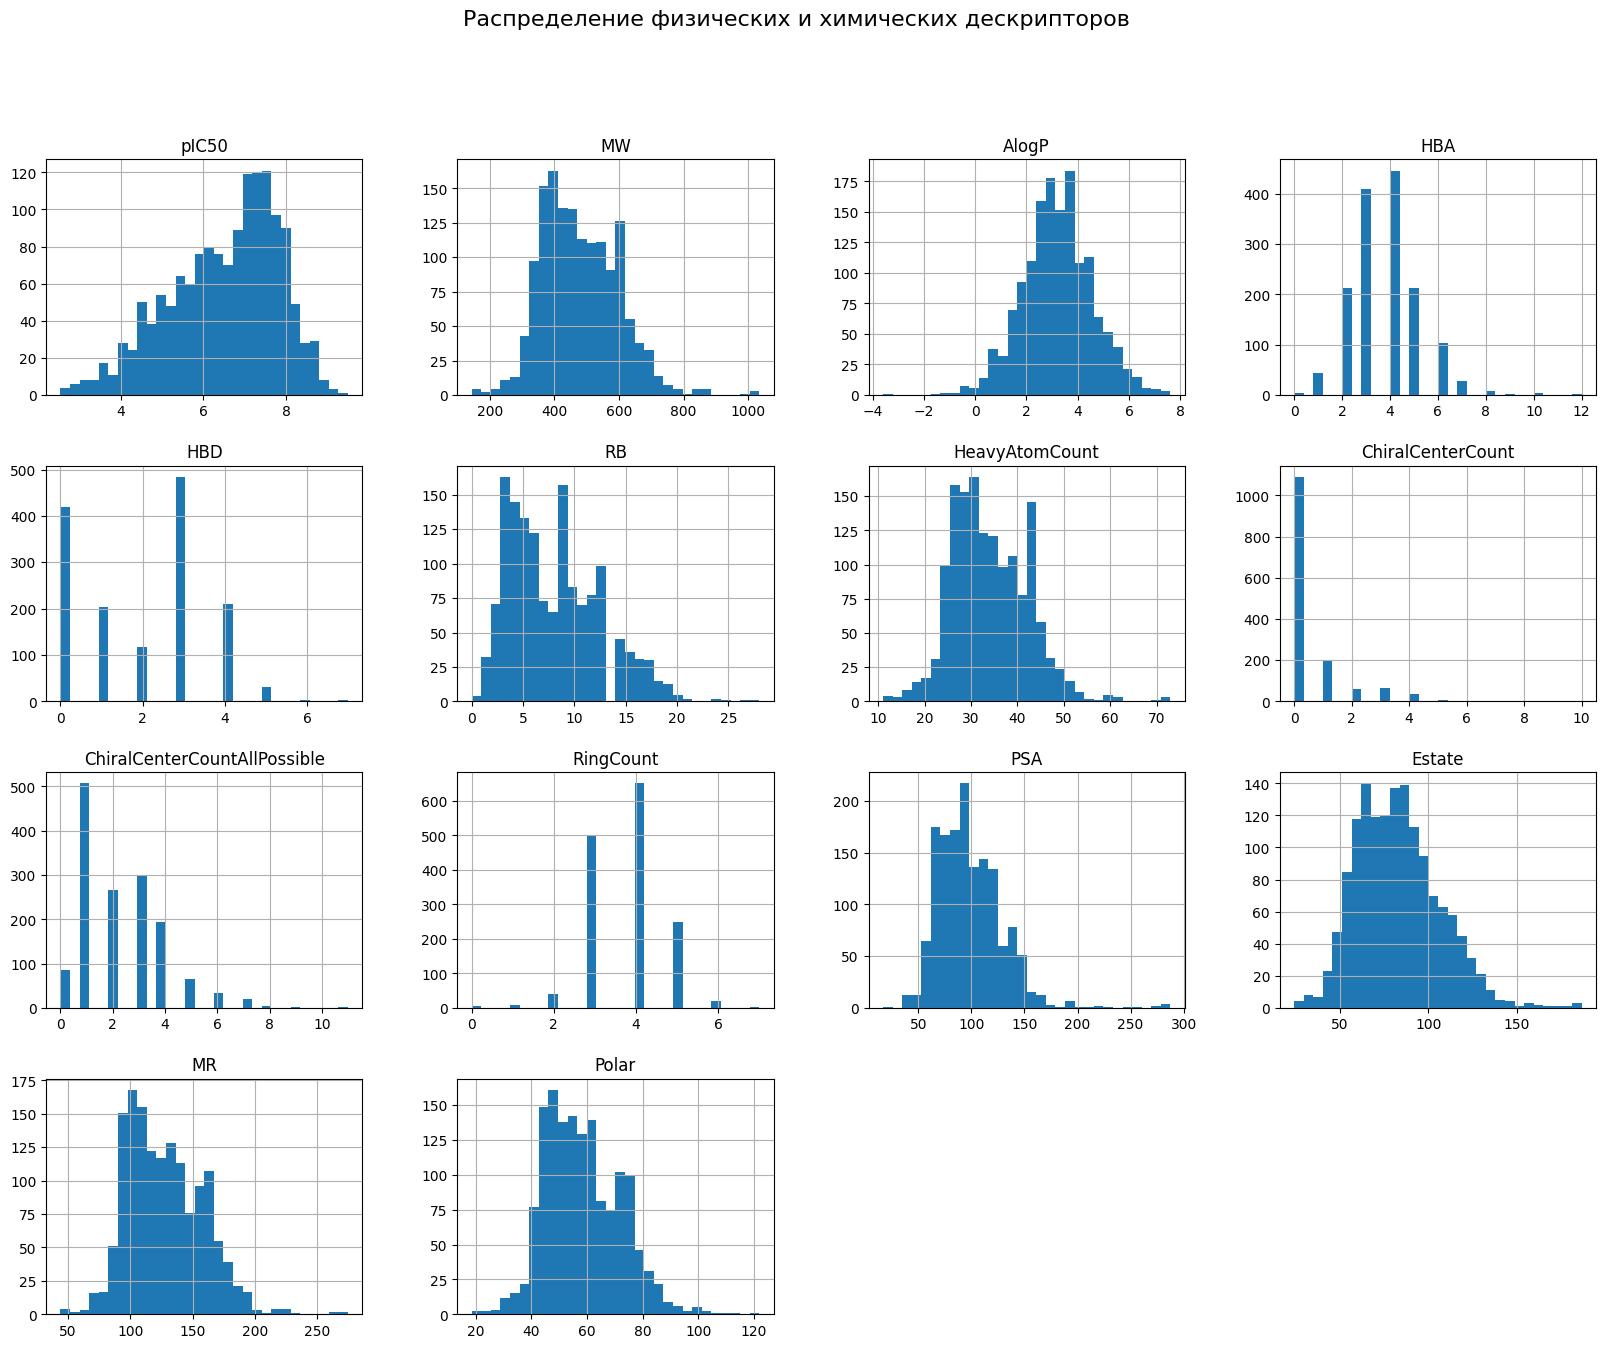

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Список физико-химических дескрипторов
physchem_cols = [
    'pIC50', 'MW', 'AlogP', 'HBA', 'HBD', 'RB',
    'HeavyAtomCount', 'ChiralCenterCount', 'ChiralCenterCountAllPossible',
    'RingCount', 'PSA', 'Estate', 'MR', 'Polar'
]

# Выбираем только эти колонки
physchem_data = data[physchem_cols]

# Гистограммы для каждого дескриптора
physchem_data.hist(bins=30, figsize=(20,15))
plt.suptitle("Распределение физических и химических дескрипторов", fontsize=16)
plt.show()


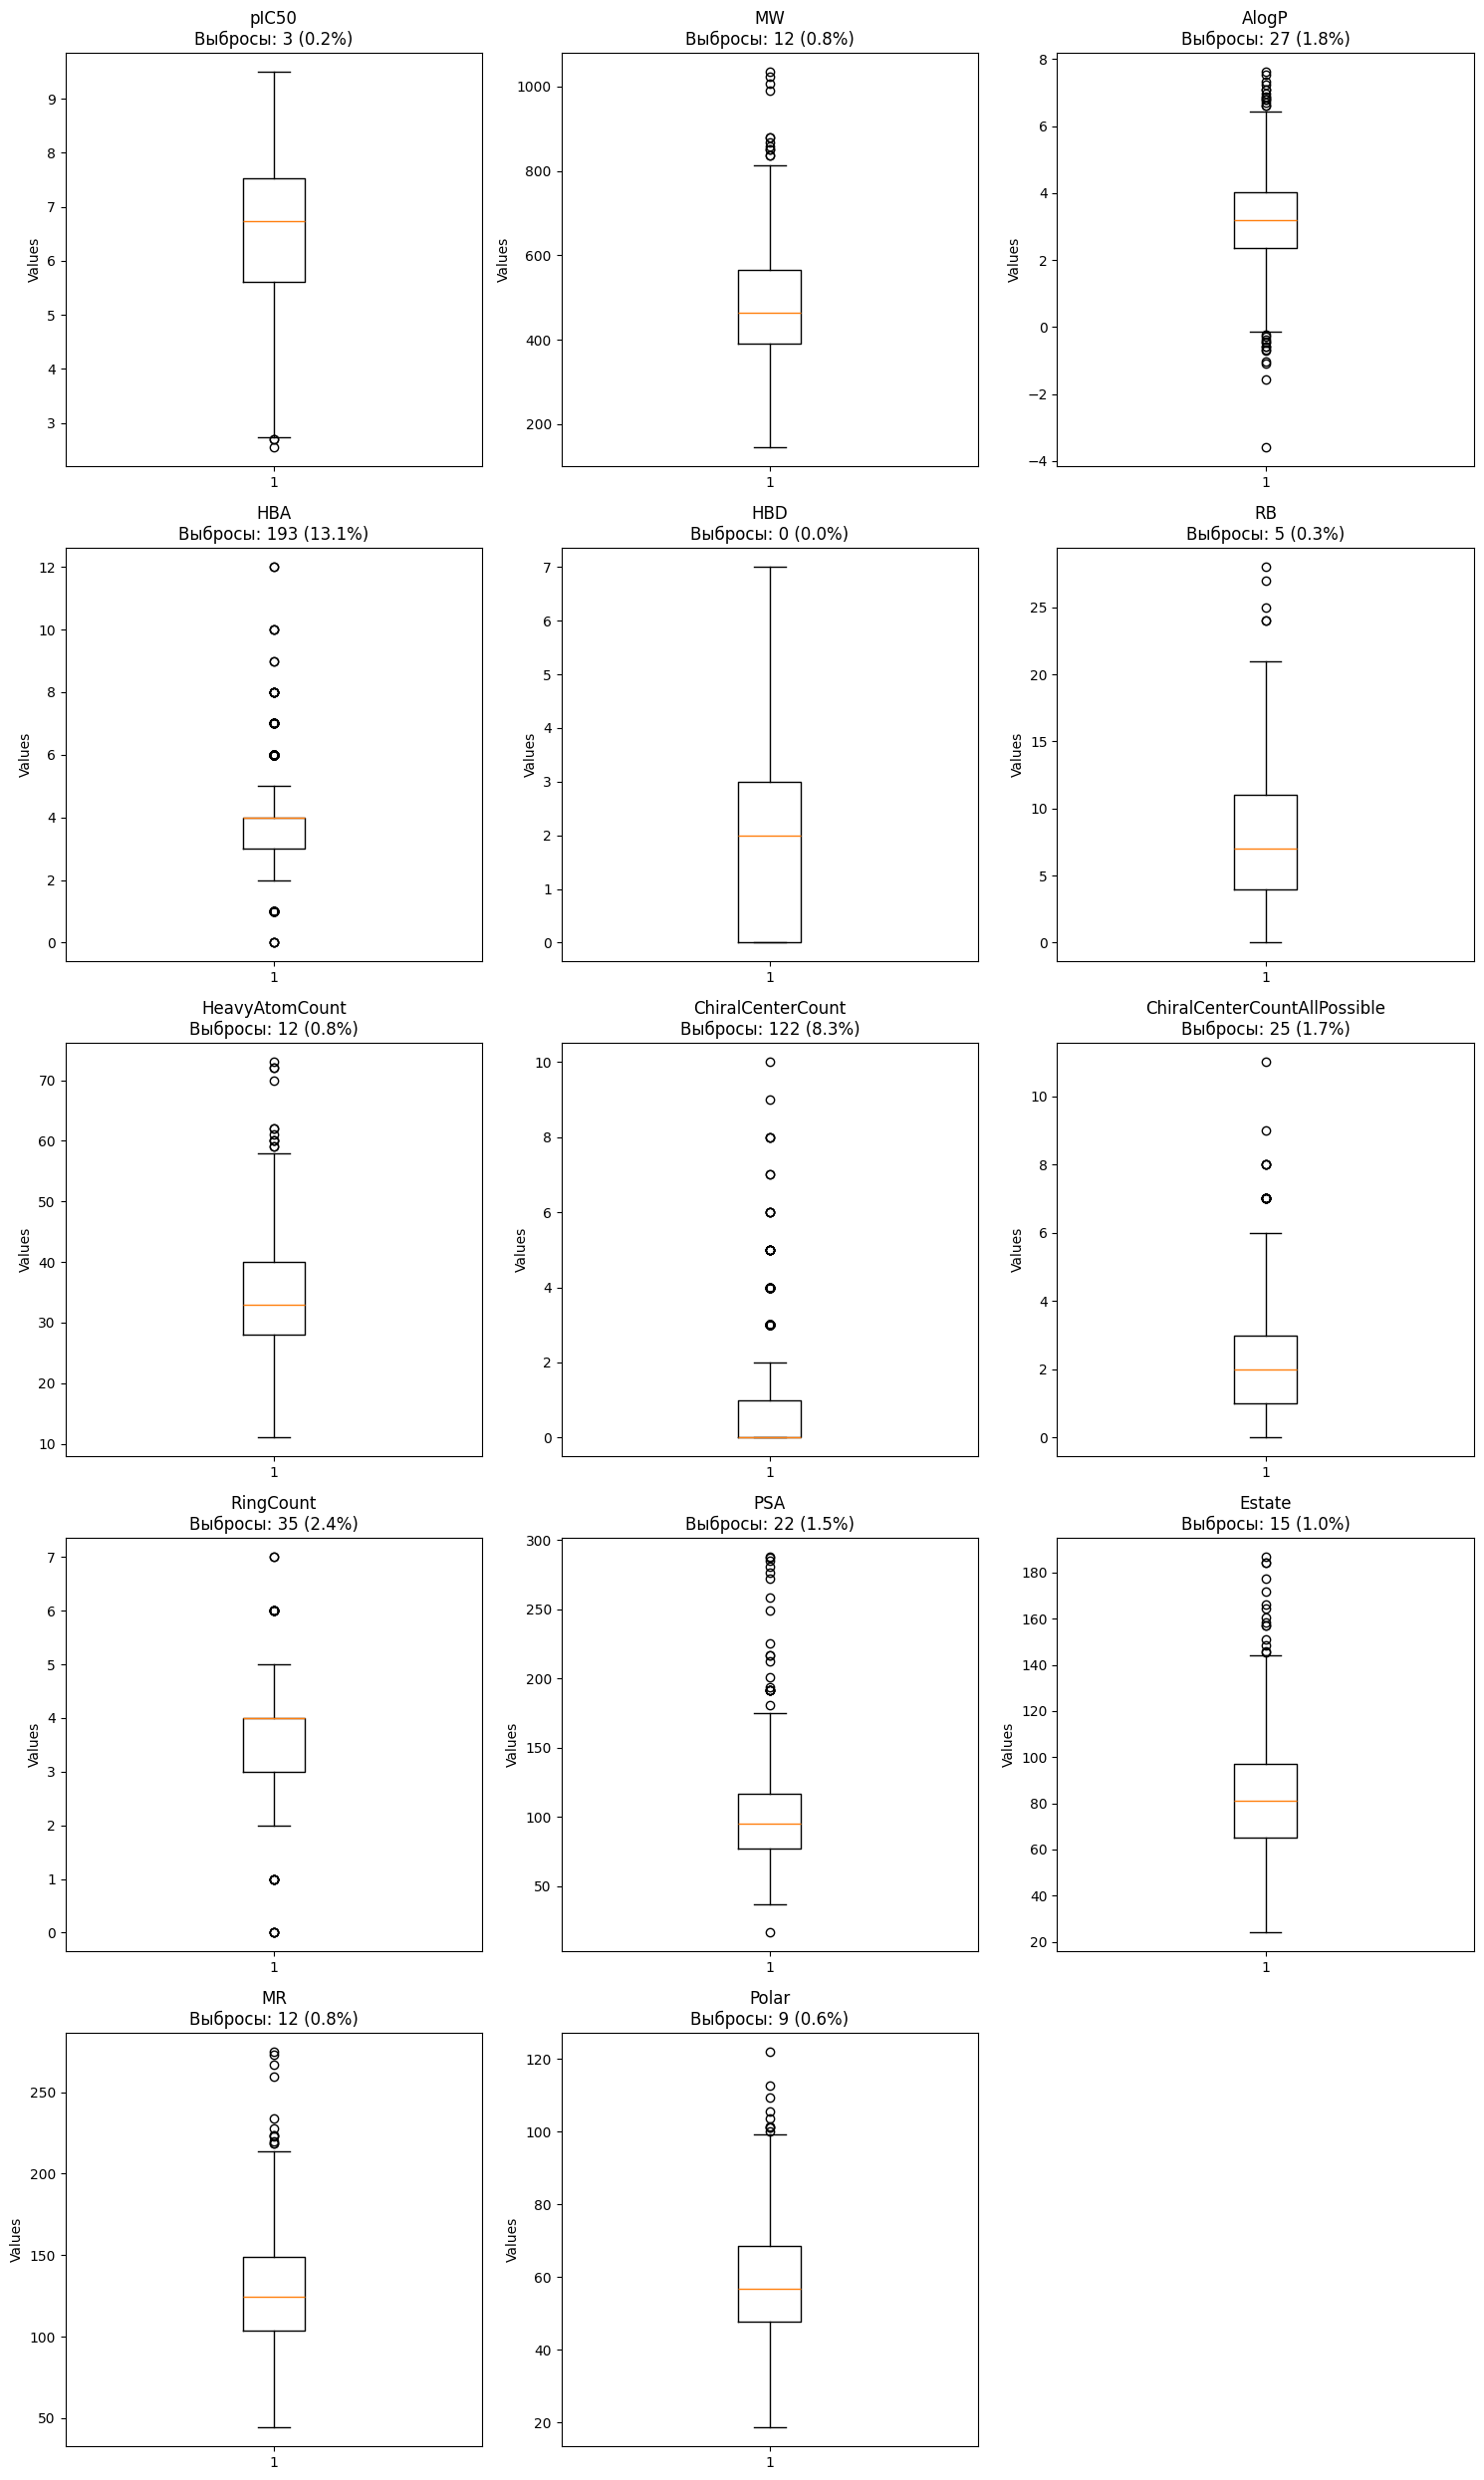

In [19]:
# Boxplot для выявления выбросов
import matplotlib.pyplot as plt


if physchem_cols:
    n_cols = 3
    n_rows = (len(physchem_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

    # flatten axes для удобства индексации
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(physchem_cols):
        data_col = physchem_data[col].dropna()
        Q1 = data_col.quantile(0.25)
        Q3 = data_col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data_col[(data_col < lower_bound) | (data_col > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(data_col)) * 100

        axes[i].boxplot(data_col)
        axes[i].set_title(f'{col}\nВыбросы: {outlier_count} ({outlier_percentage:.1f}%)')
        axes[i].set_ylabel('Values')

    # Скрываем лишние пустые axes
    for j in range(len(physchem_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()



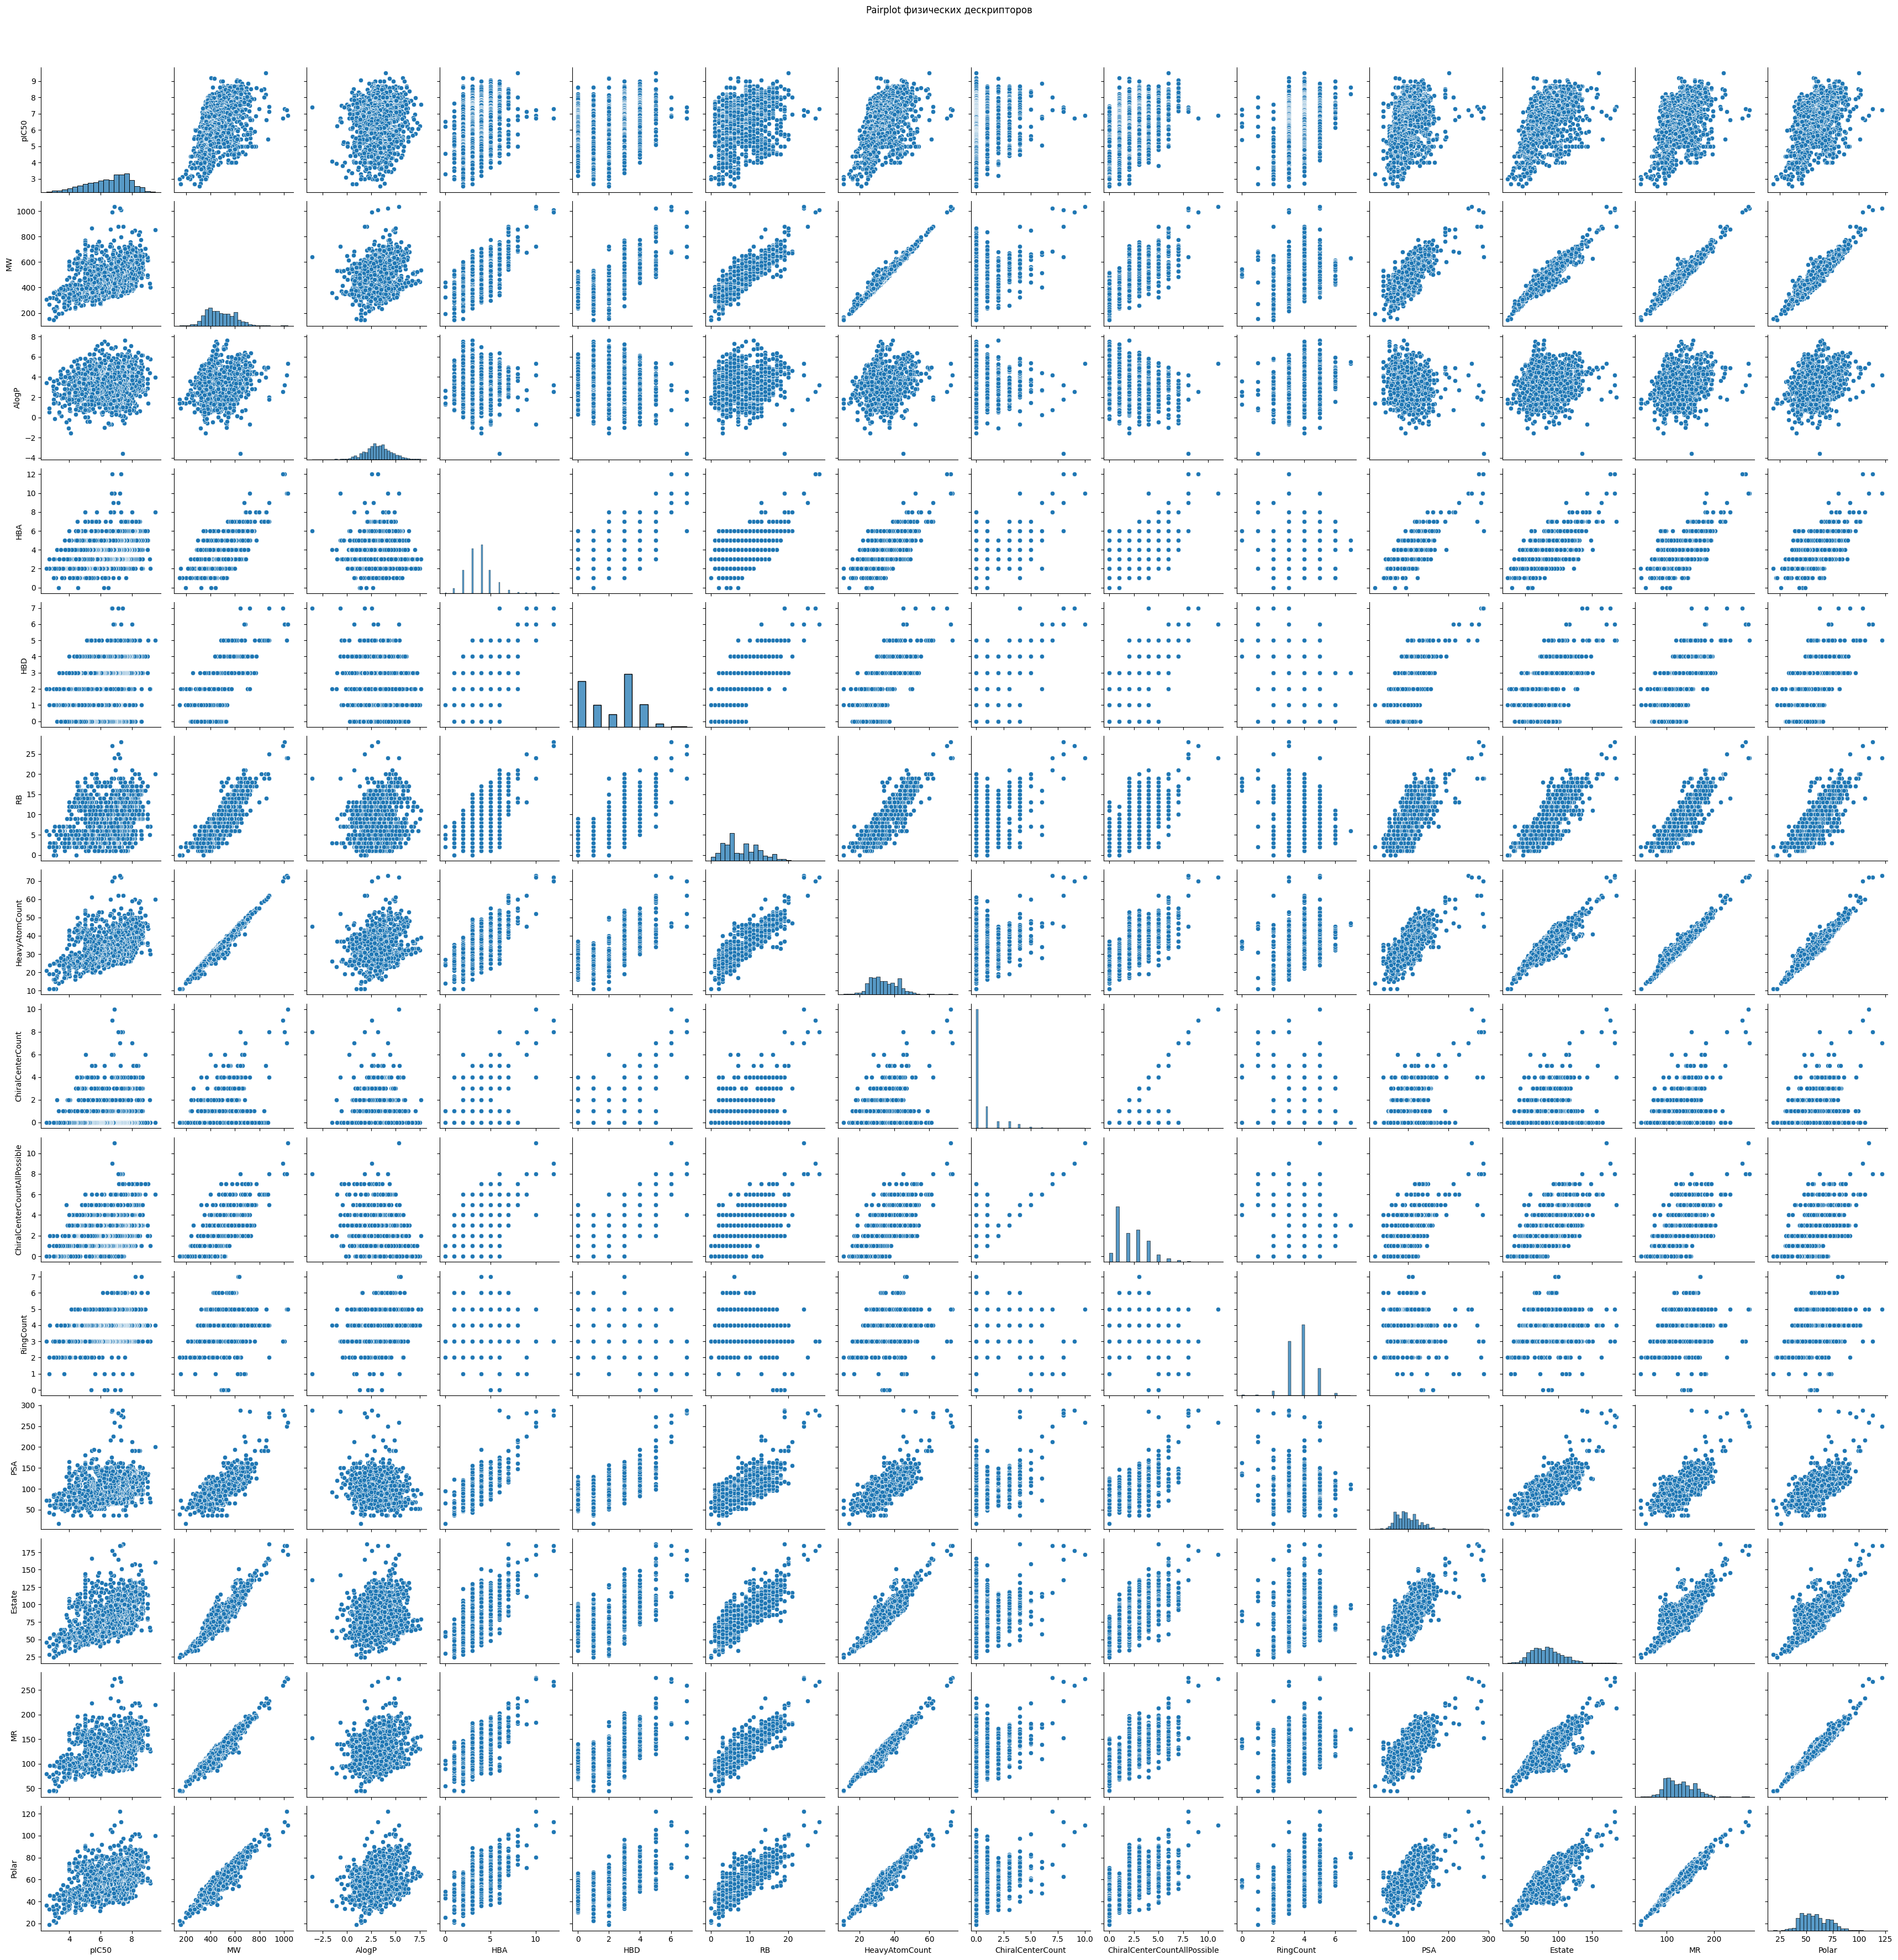

In [17]:
# Pairplot для оценки взаимосвязей между дескрипторами
sns.pairplot(physchem_data)
plt.suptitle("Pairplot физических дескрипторов", y=1.02)
plt.show()

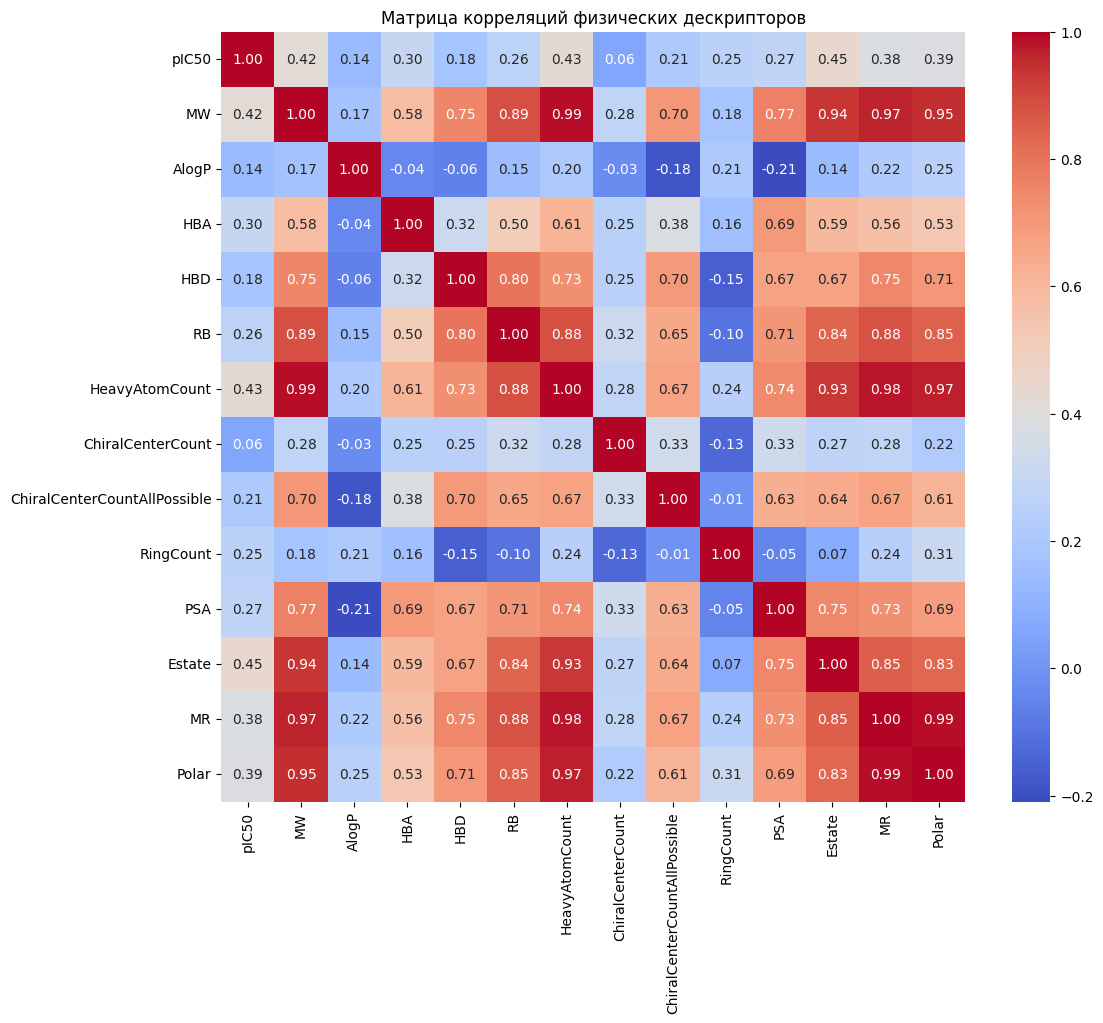

Численные значения корреляций, оцененных с помощью  коэффициента корреляции Пирсона:
                               pIC50    MW  AlogP   HBA   HBD    RB  \
pIC50                          1.00  0.42   0.14  0.30  0.18  0.26   
MW                             0.42  1.00   0.17  0.58  0.75  0.89   
AlogP                          0.14  0.17   1.00 -0.04 -0.06  0.15   
HBA                            0.30  0.58  -0.04  1.00  0.32  0.50   
HBD                            0.18  0.75  -0.06  0.32  1.00  0.80   
RB                             0.26  0.89   0.15  0.50  0.80  1.00   
HeavyAtomCount                 0.43  0.99   0.20  0.61  0.73  0.88   
ChiralCenterCount              0.06  0.28  -0.03  0.25  0.25  0.32   
ChiralCenterCountAllPossible   0.21  0.70  -0.18  0.38  0.70  0.65   
RingCount                      0.25  0.18   0.21  0.16 -0.15 -0.10   
PSA                            0.27  0.77  -0.21  0.69  0.67  0.71   
Estate                         0.45  0.94   0.14  0.59  0.67  0.84   
MR  

In [18]:
# Считаем корреляции c помощью коэф пирсона
corr = physchem_data.corr(method="pearson")

# Визуализация с числовыми значениями
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")  # fmt=".2f" — округляем до 2 знаков
plt.title("Матрица корреляций физических дескрипторов")
plt.show()

# Также можно вывести численную матрицу отдельно
print("Численные значения корреляций, оцененных с помощью  коэффициента корреляции Пирсона:\n", corr.round(2))


# **ВЫВОД**

**Анализ датасета**

*Размер и состав данных:*

1) Датасет содержит 1475 записей и 595 признаков, из которых 382 целочисленных, 210 вещественных и 3 категориальных.

2) Пропусков в данных практически нет — все столбцы имеют полноту ≥ 98%.

3) Идентификатор CID уникален для каждой записи, что позволяет использовать его для ссылок на молекулы без риска дубликатов.

*Выбросы:*

С помощью метода IQR были выявлены признаки с высоким уровнем выбросов (>5%):
HBA, ChiralCenterCount, aasN_Key, dO_Key, ddssS_Key, PEOE5 и другие.

**Для физико-химических дескрипторов (важных для интерпретации свойств молекул) выбросы встречаются реже:**

- pIC50 — 3 выброса (0,2%)

- MW — 12 выбросов (0,8%)

- AlogP — 27 выбросов (1,8%)

- HBA — 193 выброса (13,1%)

- HBD — 0 выбросов

- RB — 5 выбросов (0,3%)

- HeavyAtomCount — 12 выбросов (0,8%)

- ChiralCenterCount — 122 выброса (8,3%)

*Остальные: RingCount, PSA, Estate, MR, Polar имеют менее 3% выбросов.*

**Корреляции между физико-химическими дескрипторами, Наибольшие положительные связи наблюдаются между:**

1) MW и HeavyAtomCount (0,99)

2) RB и HBD (0,80)

3) MW и MR (0,97)

4) MW и Polar (0,95)

*Признак pIC50 умеренно коррелирует с MW (0,42), HBA (0,30), Estate (0,45) и другими.*

Корреляции позволяют выявить взаимозависимости между размерами молекул, количеством атомов, топологическими и полярными свойствами.

Остальные дескрипторы, не включенные в физико-химическую группу, в основном топологические и векторные; они используются для описания структуры молекулы и распределения заряда, но их интерпретация сложнее.

**Вывод по визуализации и анализу физико-химических дескрипторов:**

- Boxplot показывает редкие экстремальные значения для большинства признаков, кроме HBA и ChiralCenterCount, где выбросов больше 10%.

- Матрица корреляций и численные значения позволяют понять взаимосвязь между признаками и выявить сильные линейные зависимости, что важно для дальнейшего моделирования (например, машинного обучения).

- Данные чистые, без пропусков, что упрощает подготовку к моделированию и визуальному анализу.

- Физико-химические дескрипторы хорошо подходят для интерпретации химической природы молекул, в то время как топологические и векторные дескрипторы больше полезны для алгоритмических методов и предсказаний.